<a href="https://colab.research.google.com/github/SARA3SAEED/ML-Mu/blob/main/s03c_unsupervised_clustering_dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning | Clustering (DBSCAN)

Today's Outline:
- Intuition
- Full Case-study

### Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


==========

## DBSCAN Clustering | Intuition (Moon)

Scikit-Learn Clustering Module: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster

Visualizing DBSCAN Clustering: https://www.naftaliharris.com/blog/visualizing-dbscan-clustering/

### Importing Data

In [36]:
moons = pd.read_csv('/content/drive/MyDrive/ML-Mu/clustering-materials/datasets/moons.csv')
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


### Exploring Data

<Axes: xlabel='X1', ylabel='X2'>

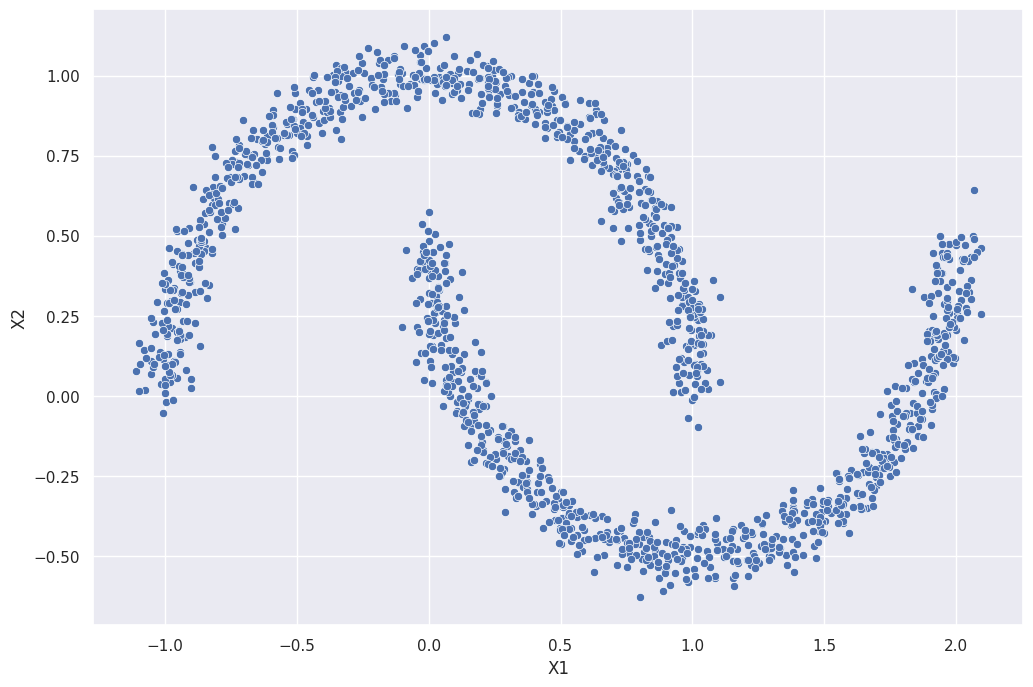

In [37]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='X1',y='X2',data=moons)

### DBSCAN vs. K-Means

##### K-Means Clustering

In [38]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2)

In [39]:
# K-Means Clustering
labels = model.fit_predict(moons)
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 1, 0], dtype=int32)

<Axes: xlabel='X1', ylabel='X2'>

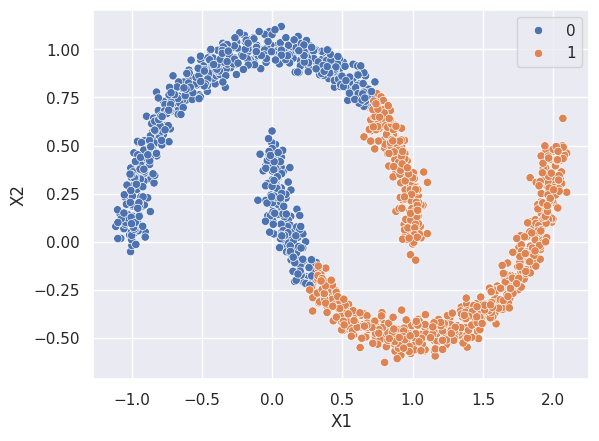

In [40]:
# Plotting K-Means Clusters
sns.scatterplot(data=moons,x='X1',y='X2',hue=labels)

##### DBSCAN Clustering

In [41]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps=0.2)

In [42]:
# DBSCAN Clustering
labels = model.fit_predict(moons)
labels

array([0, 0, 0, ..., 1, 0, 0])

<Axes: xlabel='X1', ylabel='X2'>

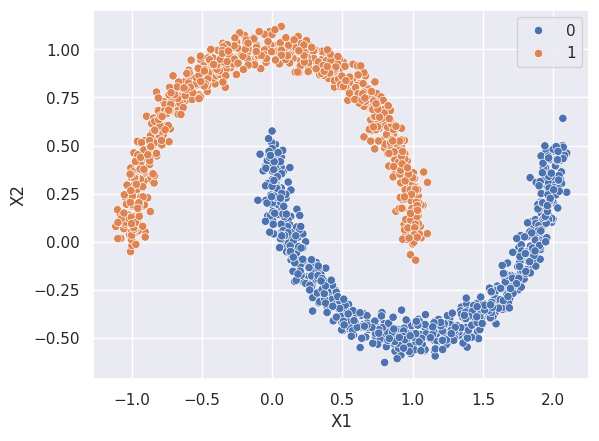

In [43]:
# Plotting DBSCAN Clusters
sns.scatterplot(data=moons,x='X1',y='X2',hue=labels)

==========

## DBSCAN Clustering | Full Case-study (Wholesale Customers)

Dataset: https://archive.ics.uci.edu/ml/datasets/wholesale+customers

### Importing & Inspecting Data

In [44]:
whole = pd.read_csv('/content/drive/MyDrive/ML-Mu/clustering-materials/datasets/wholesale-customers-data.csv')

In [45]:
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [46]:
whole.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [66]:
whole['Channel'].unique()

array([2, 1])

In [68]:
whole['Channel'].value_counts()

,count
Channel,
1,298
2,142


In [67]:
whole['Region'].unique()

array([3, 1, 2])

In [69]:
whole['Region'].value_counts()

,count
Region,
3,316
1,77
2,47


### Exploring Data

<Axes: xlabel='Milk', ylabel='Grocery'>

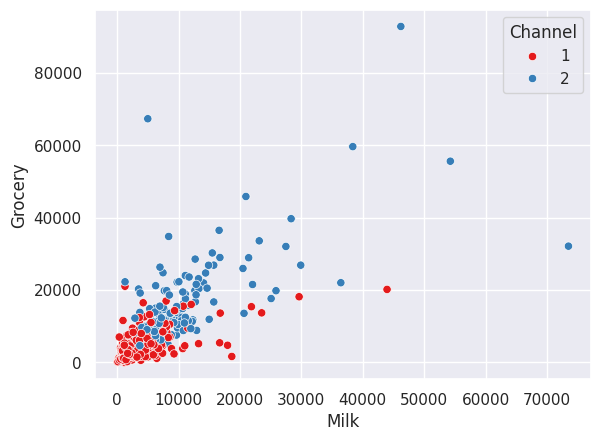

In [47]:
# Create a scatterplot showing the relation between MILK and GROCERY spending, colored by Channel column
sns.scatterplot(data=whole,x='Milk',y='Grocery',hue='Channel', palette='Set1')

In [70]:
whole.drop(['Region','Channel'],axis=1).corr()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
Fresh,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,-0.037327
Milk,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,-0.617739
Grocery,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,-0.710874
Frozen,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,-0.094427
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,-0.696420
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,-0.331462
Labels,-0.037327,-0.617739,-0.710874,-0.094427,-0.696420,-0.331462,1.000000


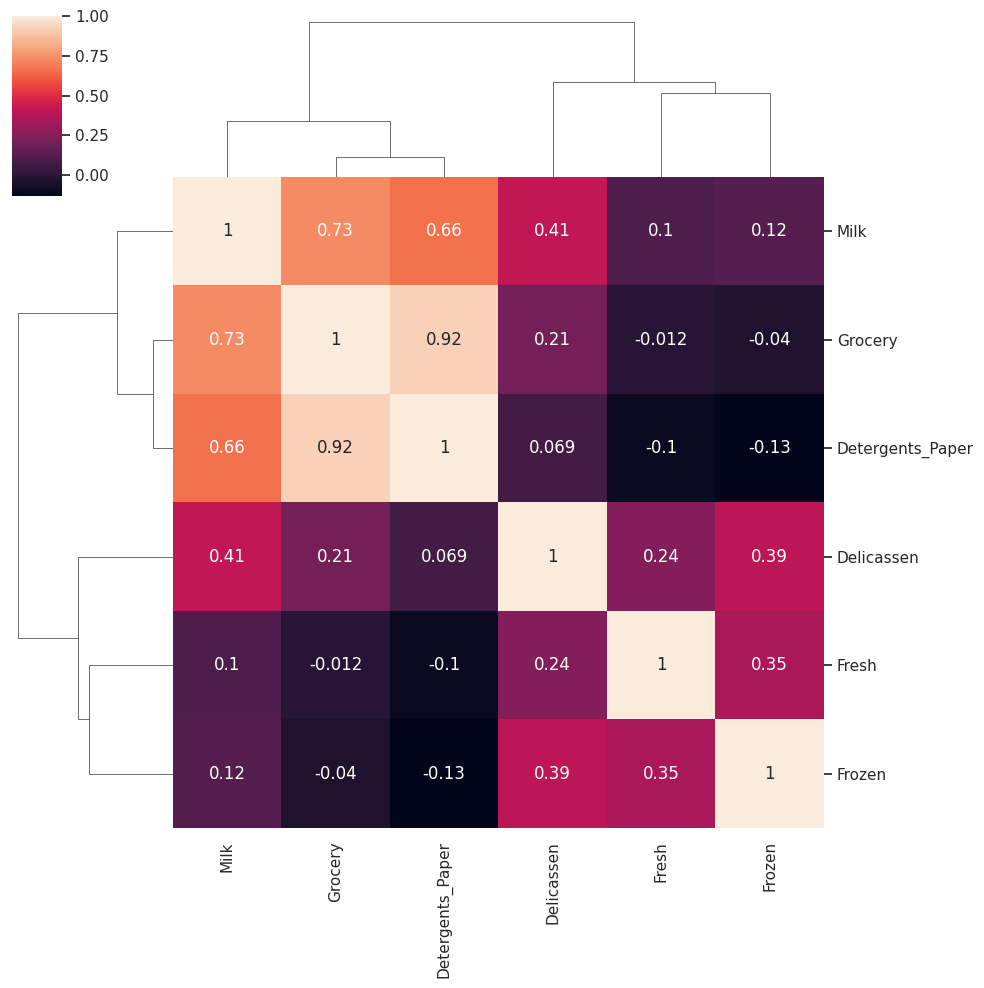

In [49]:
# Create an annotated clustermap of the correlations between spending on different cateogires.
sns.clustermap(whole.drop(['Region','Channel'],axis=1).corr(),annot=True);

<Axes: xlabel='Milk', ylabel='Count'>

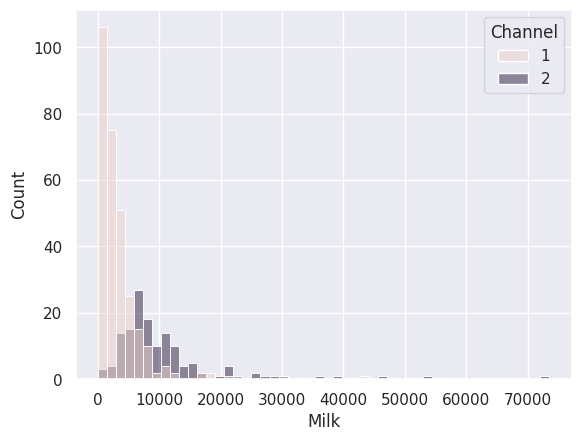

In [48]:
# Use seaborn to create a histogram of MILK spending, colored by Channel.
sns.histplot(whole,x='Milk',hue='Channel')

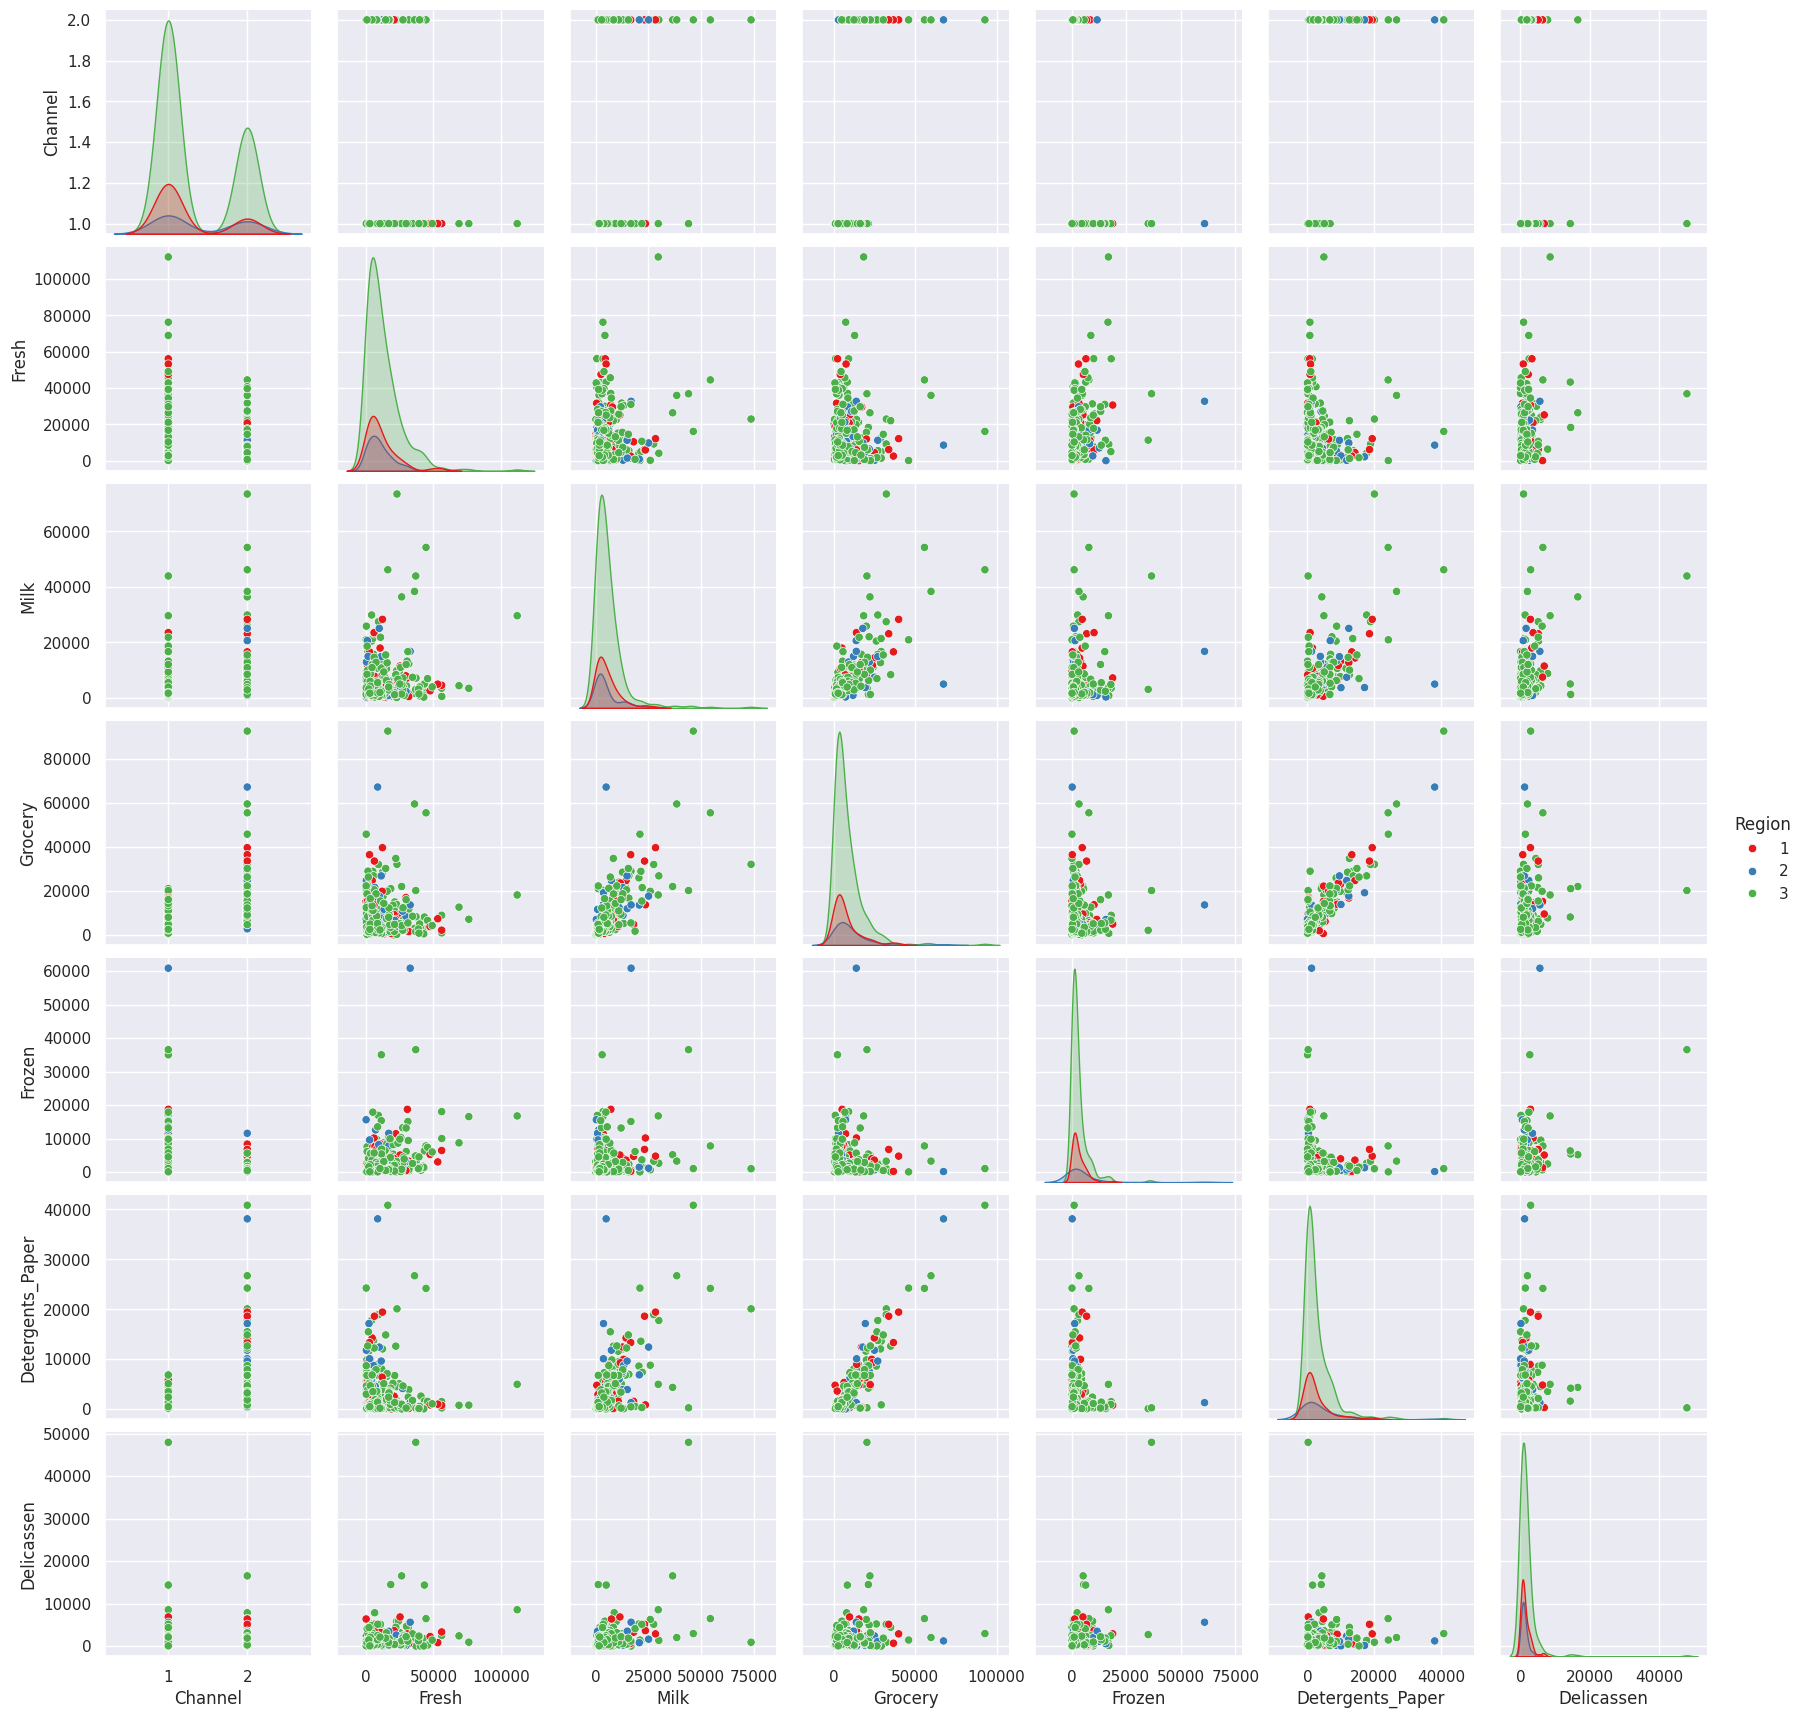

In [50]:
# Create a PairPlot of the dataframe, colored by Region.
sns.pairplot(whole,hue='Region',palette='Set1')

**Data preprocessing**

In [51]:
# Since the values of the features are in different orders of magnitude
# let's scale the data. Use StandardScaler to scale the data.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(whole)

In [52]:
scaled_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

### Model Building & Predicting

##### DBSCAN with Chosen Value of Epsilon

In [55]:
from sklearn.cluster import DBSCAN

In [56]:
dbscan = DBSCAN(eps=2)
dbscan.fit(scaled_X)

DBSCAN(eps=2)

In [71]:
dbscan.labels_

array([ 0,  0,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  1,  0,
        1,  0,  1,  0,  1,  1, -1,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,
        1,  0,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  0, -1,  0,  0,  1,
        1,  0,  0,  1,  1,  0,  0,  1,  1,  0, -1,  0,  0,  1, -1,  1,  0,
        1,  1,  1, -1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  0,  1,  0,
       -1, -1, -1,  1,  1,  1,  1, -1, -1,  0,  1,  0,  1,  1,  1,  0,  0,
        0,  1,  1,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  0,  1, -1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  0,  0,  1,  1,  1,
        0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
        1,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,  0,  1,  1,
        1,  0,  1,  0,  1,  0,  1, -1,  1,  1,  0,  1,  0,  1,  0,  1,  1,
        1,  1,  0,  1,  1

In [79]:
set(dbscan.labels_)

{-1, 0, 1}

In [80]:
len(set(dbscan.labels_))

3

<Axes: xlabel='Grocery', ylabel='Milk'>

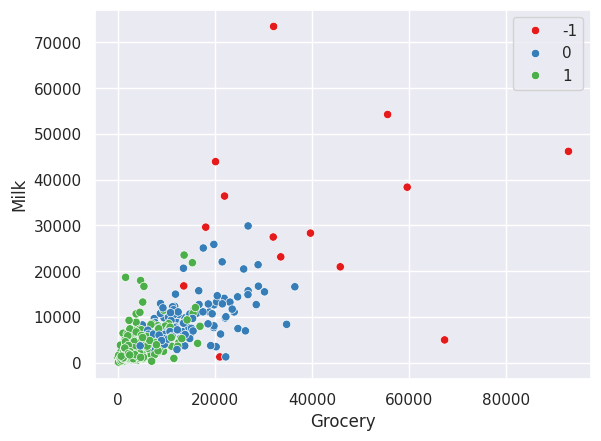

In [57]:
# Create a scatterplot of Milk vs Grocery, colored by the discovered labels of the DBSCAN model.
sns.scatterplot(data=whole,x='Grocery',y='Milk',hue=dbscan.labels_, palette='Set1')

In [74]:
whole['clusters'] = dbscan.labels_
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels,clusters
0,2,3,12669,9656,7561,214,2674,1338,0,0
1,2,3,7057,9810,9568,1762,3293,1776,0,0
2,2,3,6353,8808,7684,2405,3516,7844,0,0
3,1,3,13265,1196,4221,6404,507,1788,1,1
4,2,3,22615,5410,7198,3915,1777,5185,0,0


In [76]:
#Outlirs
whole[whole['clusters']==-1]

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels,clusters
23,2,3,26373,36423,22019,5154,4337,16523,-1,-1
47,2,3,44466,54259,55571,7782,24171,6465,-1,-1
61,2,3,35942,38369,59598,3254,26701,2017,-1,-1
65,2,3,85,20959,45828,36,24231,1423,-1,-1
71,1,3,18291,1266,21042,5373,4173,14472,-1,-1
85,2,3,16117,46197,92780,1026,40827,2944,-1,-1
86,2,3,22925,73498,32114,987,20070,903,-1,-1
87,1,3,43265,5025,8117,6312,1579,14351,-1,-1
92,2,3,9198,27472,32034,3232,18906,5130,-1,-1
93,1,3,11314,3090,2062,35009,71,2698,-1,-1


In [78]:
len(whole[whole['clusters']==-1])

17

<Axes: xlabel='Detergents_Paper', ylabel='Milk'>

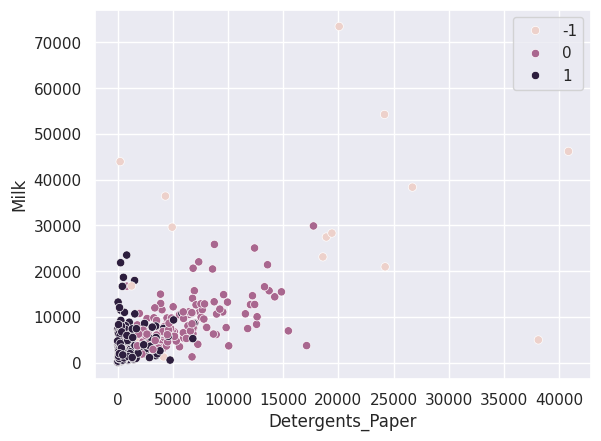

In [58]:
# Create a scatterplot of Milk vs. Detergents Paper colored by the labels.
sns.scatterplot(data=whole,x='Detergents_Paper',y='Milk',hue=dbscan.labels_)

In [59]:
# Create a new column on the original dataframe called "Labels" consisting of the DBSCAN labels.
whole['Labels'] = dbscan.labels_

In [60]:
whole.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


In [61]:
# Compare the statistical mean of the clusters and outliers for the spending amounts on the categories.
categories_mean = whole.drop(['Channel','Region'],axis=1).groupby('Labels').mean()
categories_mean

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,30161.529412,26872.411765,33575.823529,12380.235294,14612.294118,8185.411765
0,8200.681818,8849.446970,13919.113636,1527.174242,6037.280303,1548.310606
1,12662.869416,3180.065292,3747.250859,3228.862543,764.697595,1125.134021


In [62]:
# Normalize the dataframe from the previous task using MinMaxScaler so the spending means go from 0-1 and create a heatmap of the values.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(categories_mean)
scaled_means = pd.DataFrame(data,categories_mean.index,categories_mean.columns)

In [63]:
scaled_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
0,0.000000,0.239292,0.341011,0.000000,0.380758,0.059938
1,0.203188,0.000000,0.000000,0.156793,0.000000,0.000000


<Axes: ylabel='Labels'>

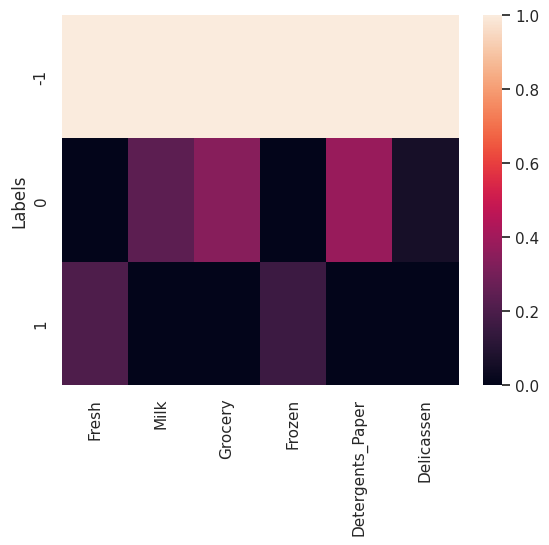

In [64]:
sns.heatmap(scaled_means)

<Axes: ylabel='Labels'>

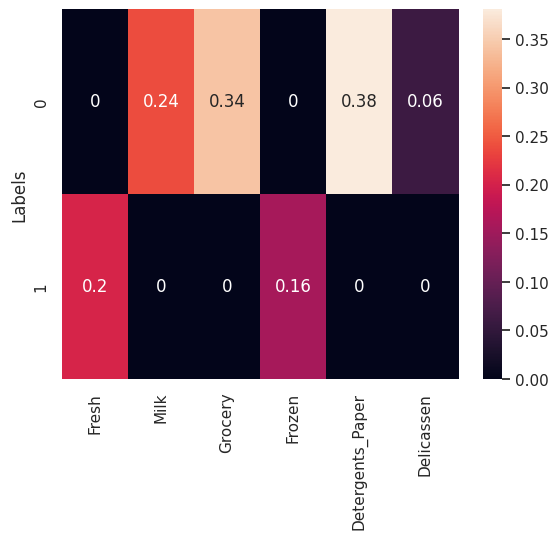

In [65]:
# Create another heatmap similar to the one above, but with the outliers removed
sns.heatmap(scaled_means.loc[[0,1]],annot=True)

##### DBSCAN with Unknown Value of Epsilon

In [81]:
outlier_percent = []

for eps in np.linspace(0.001,3,50):

    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=2*scaled_X.shape[1])
    dbscan.fit(scaled_X)


    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

    outlier_percent.append(perc_outliers)

Text(0.5, 0, 'Epsilon Value')

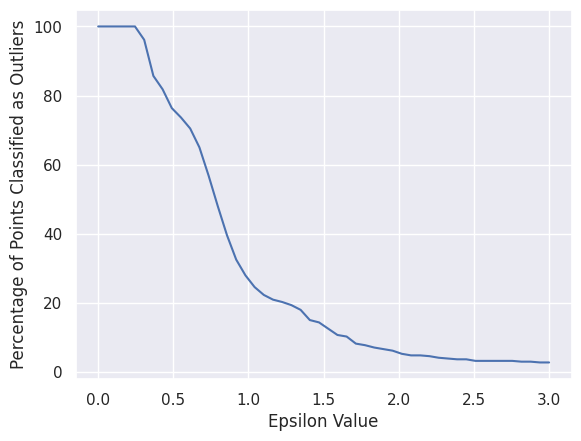

In [82]:
# Create a line plot of the percentage of outlier points versus the epsilon value choice.
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

==========

# THANK YOU!